In [324]:
import numpy as np
import matplotlib.pyplot as plt

In [325]:
def plot(image_array, cmap='gray'):
    plt.figure().set_figwidth(30)
    plt.grid(False)
    plt.axis('off')
    plt.imshow(image_array, cmap=cmap)
    plt.show()

# A)

## A-1)

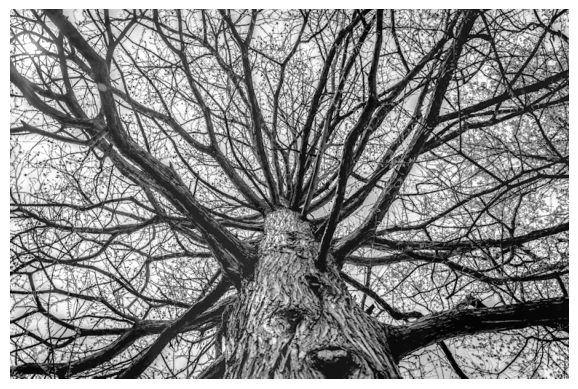

In [326]:
tree = plt.imread('arbol.png')
plot(tree)

## A-2)

In [327]:
def degradacion(image, mask):
    y_ = image.shape[0] - mask.shape[0] + 1
    x_ = image.shape[1] - mask.shape[1] + 1

    out = np.zeros([y_, x_])

    for n in range(mask.shape[0]):
        for m in range(mask.shape[1]):
            out += image[n:n+y_, m:m+x_] * mask[n, m]
    return out

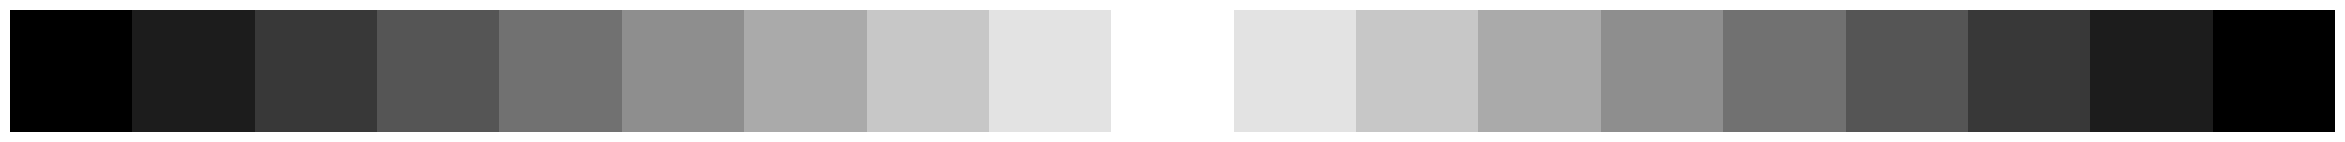

In [328]:
p = 10
h_ = np.concatenate((np.arange(1, p, 1), np.arange(p, 0, -1)), axis=0)
h = (h_/np.sum(h_)).reshape(1, 2*p - 1)
plot(h)

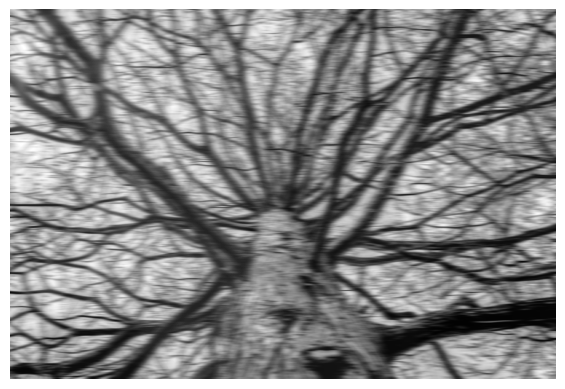

In [329]:
degraded_tree = degradacion(tree, h)
plot(degraded_tree)

## A-3)

In [330]:
def get_A(H, W=1):
    if type(W) != np.ndarray: W = np.eye(H.shape[1])

    _lambda = 1e8
    A = _lambda * np.linalg.inv((_lambda * (H.T @ H)) + W.T @ W) @ H.T

    return A


## A-4)

In [331]:
G = degraded_tree.copy()

nh = h.shape[-1]
n = G.shape[-1]
m = n + nh - 1

H = np.zeros((n, m))
for i in range(n): H[i, i:i + nh] = h.ravel()

In [332]:
def ERR(F1, F2): return (np.sum(np.abs(F1 - F2)) / F1.size) * (100)

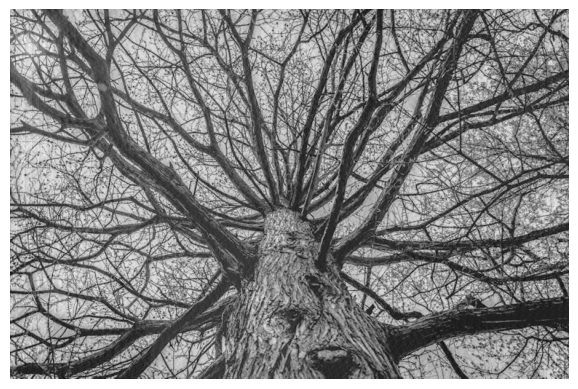

2.6593461707417543


In [333]:
restoded_tree = degraded_tree @ get_A(H).T
plot(restoded_tree)
print(ERR(tree, restoded_tree))

## A-5)

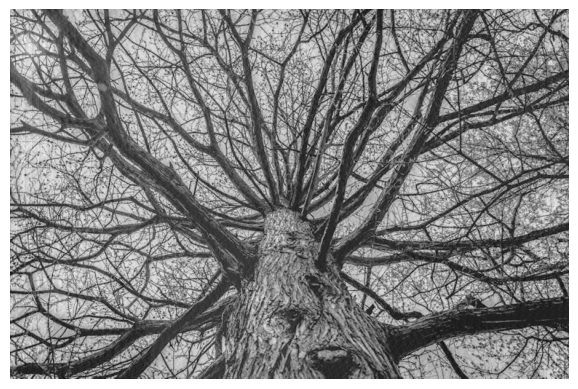

2.662999575179751


In [334]:
G = degraded_tree

nh = h.shape[-1]
n = G.shape[-1]
m = n + nh - 1
P = np.hstack([np.eye(n, dtype='float'), np.zeros((n, nh - 1))])

W = P - H

restoded_tree_minio = degraded_tree @ get_A(H, W).T
plot(restoded_tree)
print(ERR(tree, restoded_tree_minio))

## A-6)

In [335]:
def normal_2d(n, m, sigma):
    x, y = np.meshgrid(np.linspace(-1,1,n)**2, np.linspace(-1,1,m)**2)
    H = np.exp(-(x+y) / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)
    # H -= np.min(H)
    H /= np.max(H)
    return H

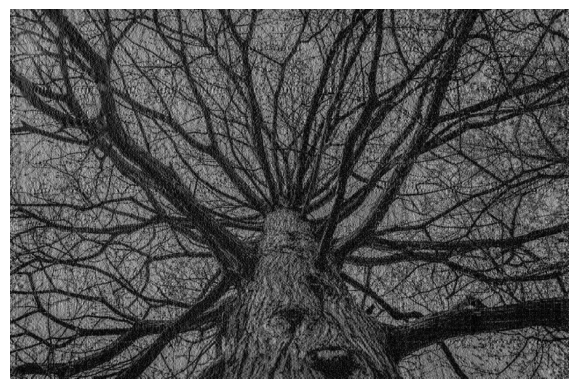

12.387317293926884


In [358]:
M = tree.shape[1]

D = np.exp(-(2j*np.pi/M) * np.arange(M).reshape(M, 1) @ np.arange(M).reshape(1, M))

norm = normal_2d(M, M, 1.0704) * (1.0065) - 0.0006
K = norm * np.eye(M)


W = K @ D

restoded_tree_fourier = degraded_tree @ get_A(H, W).T
plot(np.abs(restoded_tree_fourier))
er = ERR(tree, np.abs(restoded_tree_fourier))
print(er)

# B)

## B-1)

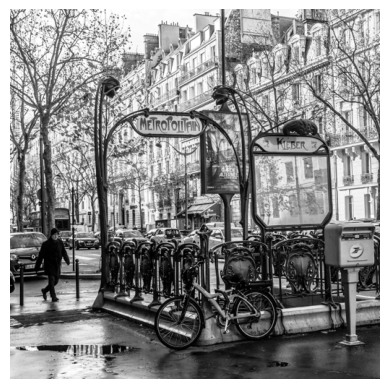

In [309]:
metro = plt.imread('metro.png')
plot(metro)

## B-2)

In [310]:
def gaussiankernel(size:int) -> np.ndarray:
    sigma = size/8.5

    x, y = np.mgrid[-size//2+1:size//2+1, -size//2+1:size//2+1]
    kernel = np.exp(-((x ** 2 + y ** 2) / (2.0 * sigma ** 2)))

    return (kernel / kernel.sum()).astype('double')

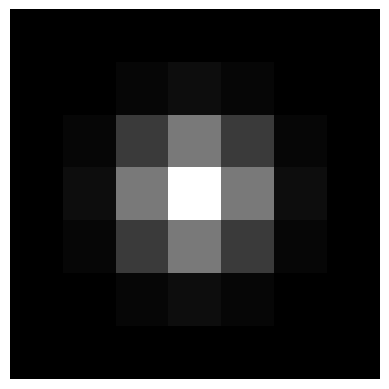

In [311]:
mask = gaussiankernel(7)
plot(mask)

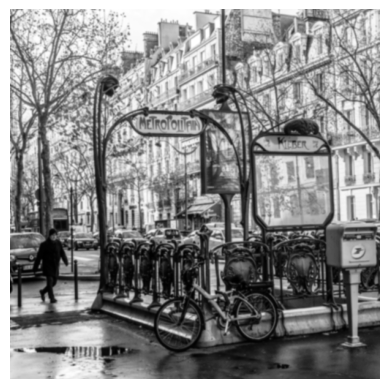

(506, 506)


In [312]:
degraded_metro = degradacion(metro, mask)
plot(degraded_metro, cmap='gray')
print(degraded_metro.shape)

## B-3)

In [313]:
def resτrabloque(image, h, p, H=None, A=None, W=None, x=0, y=0, x_base=0, y_base=0):

    """la funcion puede recibir una matriz A, W o H, pero si no las recibe las calcula"""
    if type(A) != np.ndarray:
        if type(H) != np.ndarray:
            In = (p + h.shape[0] - 1) * (p + h.shape[1] - 1)
            Hn = p**2
            H = np.zeros((Hn, In))

            b = np.zeros(((p + h.shape[0] - 1), (p + h.shape[1] - 1)))
            b[:h.shape[0], :h.shape[1]] = h.copy()
            b = b.T.reshape(1, b.size)

            c = 0
            H[0] = b.copy()
            for i in range(1, Hn):
                if i % (p) == 0:
                    c += h.shape[0] - 1
                H[i, i+c:] = b[:, :-(i+c)]

        if type(W) != np.ndarray:
            W = np.eye(H.shape[1])

        _lambda = 1e8
        A = _lambda * np.linalg.inv((_lambda * (H.T @ H)) + W) @ H.T

    G = image[y_base+y*p:y_base+(y+1)*p, x_base+x*p:x_base+(x+1)*p]
    G = G.T.reshape(G.size, 1)

    c = A @ G
    c[c < 0] = 0
    c[c > 255] = 255

    return c.reshape(p + h.shape[0] - 1, p + h.shape[0] - 1).T

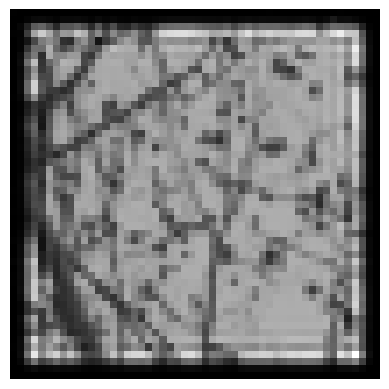

In [314]:
plot(resτrabloque(degraded_metro, mask, 23 * 2))

## B-4)

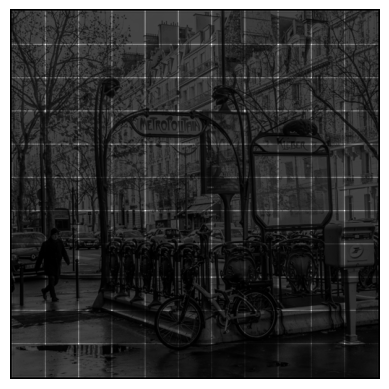

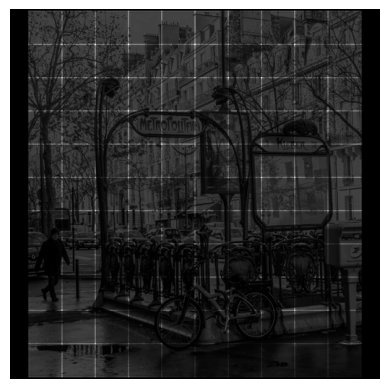

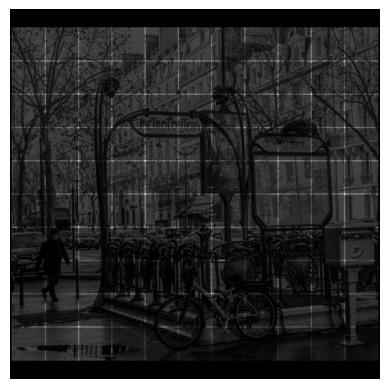

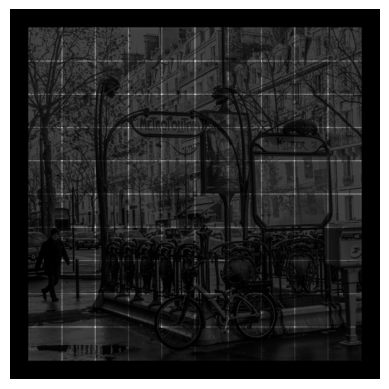

In [364]:
p = 46
step = 6



h = mask.copy()

In = (p + h.shape[0] - 1) * (p + h.shape[1] - 1)
Hn = p**2
H = np.zeros((Hn, In))

b = np.zeros(((p + h.shape[0] - 1), (p + h.shape[1] - 1)))
b[:h.shape[0], :h.shape[1]] = h.copy()
b = b.T.reshape(1, b.size)

c = 0
H[0] = b.copy()
for i in range(1, Hn):
    if i % (p) == 0:
        c += h.shape[0] - 1
    H[i, i+c:] = b[:, :-(i+c)]

W = np.eye(H.shape[1])

"""Se calcula A dado que es comun para todos los bloques, de esta forma reducimos considerablemente el tiempo de ejecucion"""
_lambda = 1e8
A = _lambda * np.linalg.inv((_lambda * (H.T @ H)) + W) @ H.T





base = int(p/2)
n_ = degraded_metro.shape[0] // p


restored_metro = np.zeros([512, 512])
for y in range(n_):
    for x in range(n_):
        restored_metro[y*p:(y+1)*p+step, x*p:(x+1)*p+step] += resτrabloque(degraded_metro, mask, p, A=A, x=x, y=y)


restored_metro_x = np.zeros([512, 512])
for y in range(n_):
    for x in range(n_ - 1):
        restored_metro_x[y*p:(y+1)*p+step, base+x*p:base+(x+1)*p+step] += resτrabloque(degraded_metro, mask, p, A=A, x=x, y=y, x_base=base)


restored_metro_y = np.zeros([512, 512])
for y in range(n_ - 1):
    for x in range(n_):
        restored_metro_y[base+y*p:base+(y+1)*p+step, x*p:(x+1)*p+step] += resτrabloque(degraded_metro, mask, p, A=A, x=x, y=y, y_base=base)


restored_metro_xy = np.zeros([512, 512])
for y in range(n_ - 1):
    for x in range(n_ - 1):
        restored_metro_xy[base+y*p:base+(y+1)*p+step, base+x*p:base+(x+1)*p+step] += resτrabloque(degraded_metro, mask, p, A=A, x=x, y=y, x_base=base, y_base=base)


plot(restored_metro)
plot(restored_metro_x)
plot(restored_metro_y)
plot(restored_metro_xy)

In [367]:
ERR(metro, restored_metro)

5.570240554290571

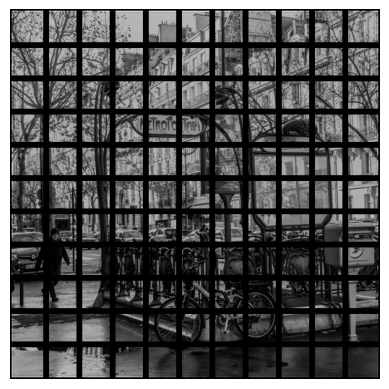

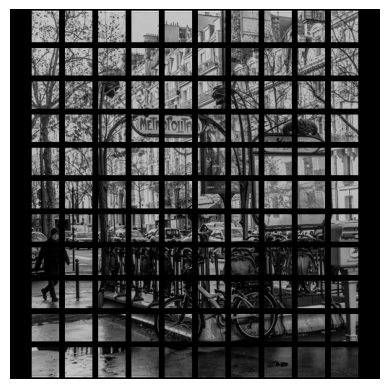

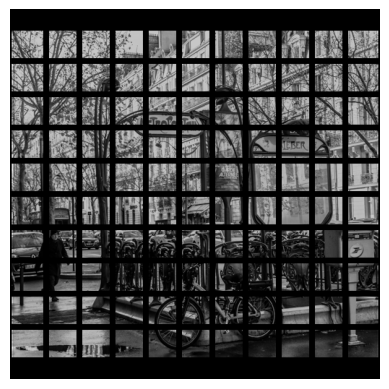

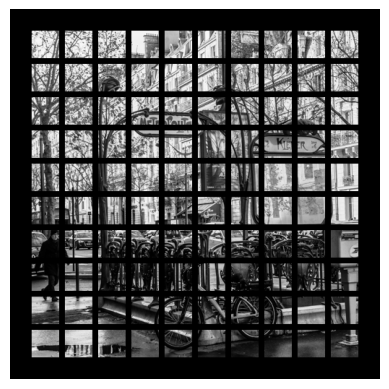

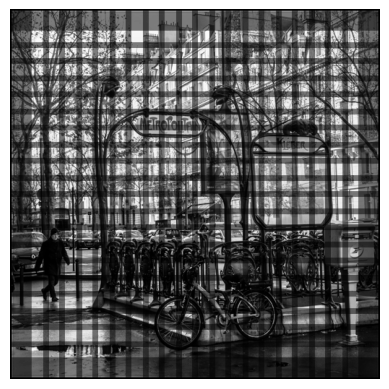

In [368]:
restored_metro_ = restored_metro.copy()
restored_metro_x_ = restored_metro_x.copy()
restored_metro_y_ = restored_metro_y.copy()
restored_metro_xy_ = restored_metro_xy.copy()



for n in range(8):
    restored_metro_[:, p+n:-int(p/2):p] = 0
    restored_metro_[p+n:-int(p/2):p, :] = 0


    restored_metro_y_[:, p+n:-int(p/2):p] = 0
    restored_metro_x_[p+n:-int(p/2):p, :] = 0
    n -= 1
    n += int(p/2)
    restored_metro_y_[n::p, :] = 0
    restored_metro_x_[:, n::p] = 0

    restored_metro_xy_[n:-int(p/2):p, :] = 0
    restored_metro_xy_[:, n:-int(p/2):p] = 0


plot(restored_metro_)
plot(restored_metro_x_)
plot(restored_metro_y_)
plot(restored_metro_xy_)


restored_sum = restored_metro_ + restored_metro_x_ + restored_metro_y_ + restored_metro_xy_
plot(restored_sum)

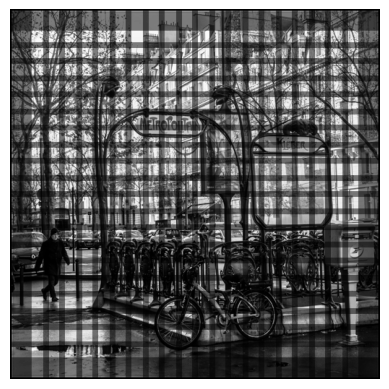

74.92479642980557
Eliminacion del grid


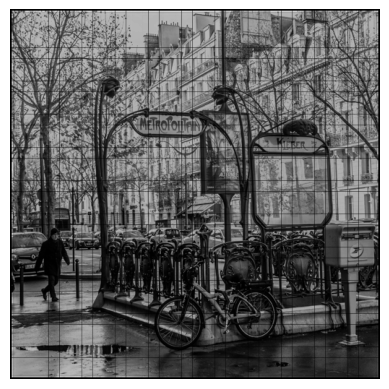

3.216070935568436
Eliminacion del segundo grid


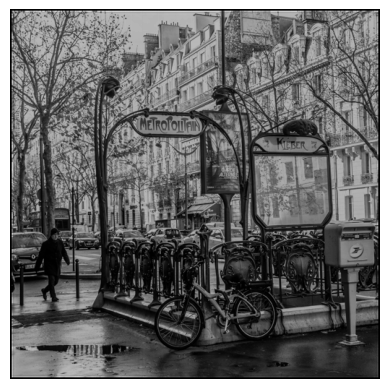

1.4025500886405444
Eliminacion de los bordes


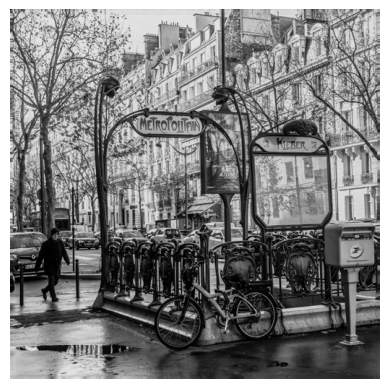

0.42859578654135133


In [374]:
restored_metro_total = restored_sum.copy()


plot(restored_metro_total)
print(ERR(metro, restored_metro_total))



pp = int(p/2)


for n in range(16):
    restored_metro_total[:, pp+7+n:-pp:pp] *= 0.5
    restored_metro_total[pp+7+n:-pp:pp, :] *= 0.5
print("""Eliminacion del grid""")
plot(restored_metro_total)
print(ERR(metro, restored_metro_total))

restored_metro_total[:, pp*2+7::pp*2] *= 2
restored_metro_total[:, pp*2+22::pp*2] *= 2
restored_metro_total[pp*2+7::pp*2, :] *= 2
restored_metro_total[pp*2+22::pp*2, :] *= 2
print("""Eliminacion del segundo grid""")
plot(restored_metro_total)
print(ERR(metro, restored_metro_total))



restored_metro_total[:, 1] *= 14
restored_metro_total[:, 2] *= 2.5 * 0.6
restored_metro_total[:, 3] *= 1.4 * 0.55
restored_metro_total[:, 4] *= 1.2
restored_metro_total[:, 5] *= 0.95
restored_metro_total[:, 6] *= 1.05

restored_metro_total[:, -6] *= 0.95
restored_metro_total[:, -5] *= 1.1
restored_metro_total[:, -4] *= 1.5 * 0.5
restored_metro_total[:, -3] *= 2.5 * 0.6
restored_metro_total[:, -2] *= 14


restored_metro_total[1, :] *= 13
restored_metro_total[1, p-1::p] *= 0.56
restored_metro_total[2, :] *= 2.5 * 0.6
restored_metro_total[3, :] *= 1.4 * 0.55
restored_metro_total[4, :] *= 1.15
restored_metro_total[5, :] *= 0.9
restored_metro_total[7, :] *= 0.95

restored_metro_total[-7, :] *= 1.05
restored_metro_total[-6, :] *= 0.9
restored_metro_total[-5, :] *= 1.1
restored_metro_total[-4, :] *= 1.5 * 0.5
restored_metro_total[-3, :] *= 2.5 * 0.6
restored_metro_total[-2, :] *= 14


restored_metro_total[0] = restored_metro_total[1]
restored_metro_total[:, 0] = restored_metro_total[:, 1]
restored_metro_total[-1] = restored_metro_total[-2]
restored_metro_total[:, -1] = restored_metro_total[:, -2]

print("""Eliminacion de los bordes""")
plot(restored_metro_total)
print(ERR(metro, restored_metro_total))

## B-5)

In [370]:
ERR(metro, restored_metro_total)

0.42859578654135133